In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.impute import SimpleImputer

In [30]:
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('D:/Personal Projects/Missing/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.shape

(891, 4)

In [6]:
df.isnull().sum()                 

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [7]:
df.isnull().mean()*100                # Age = (177/891)*100     # Fare = (45/891) *100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [8]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [9]:
x = df.drop(['Survived'], axis=1)

In [10]:
y = df['Survived']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [12]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [13]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [14]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [15]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_median'] = x_train['Age'].fillna(median_age)


x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)

In [16]:
x_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
63,4.0,27.900,5,4.0,4.0,27.900000,27.9000
708,22.0,151.550,0,22.0,22.0,151.550000,151.5500
353,25.0,17.800,1,25.0,25.0,17.800000,17.8000
336,29.0,NaN,1,29.0,29.0,32.617597,14.4583
682,20.0,9.225,0,20.0,20.0,9.225000,9.2250


In [17]:
print('Original Age Variable Variance', x_train['Age'].var() )
print('Age Variance after mean Imputation', x_train['Age_mean'].var() )
print('Age Variance after median Imputation', x_train['Age_median'].var() )


print('Original Fare Variable Variance', x_train['Fare'].var() )
print('Fare Variance after mean Imputation', x_train['Fare_mean'].var() )
print('Fare Variance after median Imputation', x_train['Fare_median'].var() )

Original Age Variable Variance 204.3495133904614
Age Variance after mean Imputation 161.81262452718673
Age Variance after median Imputation 161.9895663346054
Original Fare Variable Variance 2448.197913706318
Fare Variance after mean Imputation 2324.2385256705547
Fare Variance after median Imputation 2340.0910219753637


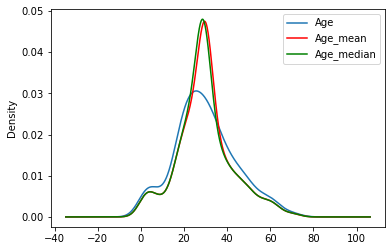

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# Variable imputed with median
x_train['Age_mean'].plot(kind='kde', ax=ax, color='red')

# Variable imputed with mean
x_train['Age_median'].plot(kind='kde', ax=ax, color='green')

# add_legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

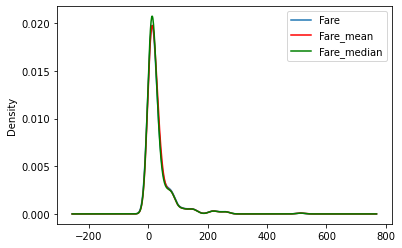

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# Variable imputed with median
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')

# Variable imputed with mean
x_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

# add_legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [20]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [21]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<AxesSubplot:>

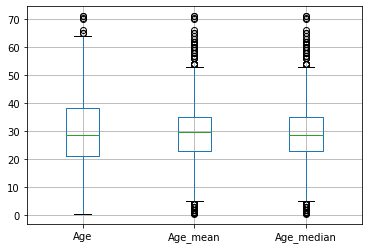

In [22]:
x_train[['Age','Age_mean','Age_median']].boxplot()

<AxesSubplot:>

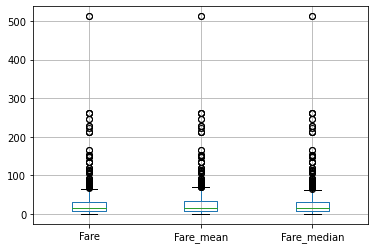

In [23]:
x_train[['Fare','Fare_mean','Fare_median']].boxplot()

# Using SKlearn (ColumnTransformer)

In [ ]:
# https://www.youtube.com/watch?v=NGq8wnH5VSo       # Explanation of ColumnTransformer

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [29]:
imputer1 = SimpleImputer(strategy = 'mean')
imputer2 = SimpleImputer(strategy = 'median')

In [32]:
trf = ColumnTransformer( [
    
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare']),
    
], remainder= 'passthrough' )

In [33]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [34]:
# trf.fit_transform(x_train)

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

In [35]:
trf.named_transformers_['imputer1'].statistics_      # Mean value of Age

array([29.78590426])

In [36]:
trf.named_transformers_['imputer2'].statistics_       # Median value of Fare

array([14.4583])

In [38]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [39]:
x_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

In [40]:
x_test

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 29.78590426,  56.4958    ,   0.        ],
       [ 29.78590426,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 29.78590426,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  14.4583    ,   1.        ],
       [ 65.        ,   7.75   